## 5.1 회귀 소개

1. 회귀  
    - 독립변수 : 피처, 종속변수 : 결정값  
    - 회귀 예측의 핵심 : 최적의 회귀계수 찾기  


2. 지도학습 종류  
    - 분류 : 예측값이 이산형 클래스 값  
    - 회귀 : 예측값이 연속형 숫자 값  
    
    
3. 선형 회귀 
    - (실제 값 - 예측값)의 제곱을 최소화하는 직선형 회귀선을 최적화하는 방식
    - 종류
        - 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델  
        - 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수 값을 더 작게 만드는 규제 모델이다.  
        - 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.  
        - 엘라스틱넷(ElasticNet) : L2,L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.  
        - 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류 뿐만 아니라 희소 영역의 분류(ex. 텍스트 분류)에서 뛰어난 예측 성능을 보인다.

## 5.2 단순 선형 회귀를 통한 회귀 이해

**단순 선형 회귀**  
- 독립변수 1개, 종속변수 1개  
- 잔차 : 실제값 - 회귀모델 -> 전체 데이터의 잔차 합의 최소(목표)  = 오류값 합을 최소로 만드는 최적의 회귀계수 찾기  
- 오류 합 계산 : Mean Absolute Error, Residual Sum of Square(RSS)  


**RSS(Residual Sum of Square)**  
- $Error^2 = RSS$ 
- $RSS(w_0,w_1) = \frac{1}{N}\sum\limits_{i=1}^N(y_i-(w_0+w_1*x_i))^2$  
- RSS => 비용함수(=손실함수)  

## 5.3 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

**경사 하강법(Gradient Descent)**  
- 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다.  
- 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다.

**경사 하강법 일반적인 프로세스**  
1. Step 1
    - $w_1,w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.  
2. Step 2  
    - $\eta$ : 보정 계수로 학습률을 의미  
    - $w_1$을 $w_1-\eta\frac{2}{N}\sum\limits_{i=1}^Nx_i*(실제값_i- 예측값_i)$, $w_0$을 $w_0-\eta\frac{2}{N}\sum\limits_{i=1}^Nx_i*(실제값_i- 예측값_i)$으로 업데이트한 후 다시 비용함수의 값을 계산한다.  
3. Step 3  
    - 비용 함수의 값이 감소했으면 다시 Step 2를 반복한다.  
    - 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $w_1,w_0$를 구하고 반복을 중지한다.

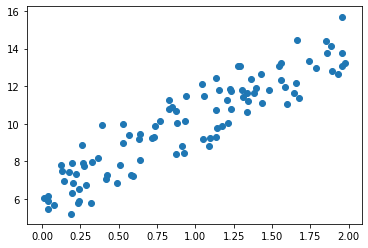

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1) # Unif(0,1)
y = 6 + 4*X+np.random.randn(100,1) # N(0,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

**경사하강법 구현**

In [8]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1) # w1와 깉은 형태와 타입을 갖는 0으로 채워진 array
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T)+w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # X.T : 전치행렬, np.dot : 내적 연산
                                                        # 100개의 데이터 X(1,2,..,100)이 있다면 예측값은 w0+X(1)*w1+X(2)*x1+..+X(100)*w1이며,
                                                       # 이는 입력 배열 X와 w1 배열의 내적과 동일하다. -> dot 연산 이용
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

In [9]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    
    return  w1,w0

In [14]:
# 최종적으로 예측값과 실제값의 RSS 차이를 계산
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식은 y = 4X+6과 유사하게 w1은 4.022, w0는 6.162가 도출되었다. 예측 오류 비용은 약 0.9935이다.

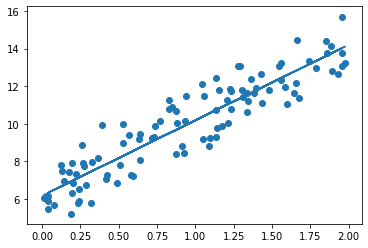

In [15]:
plt.scatter(X,y)
plt.plot(X,y_pred)

**확률적 경사 하강법(Stochastic Gradient Descent**  
- 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 <u>일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다.</u>  
- 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.  

In [22]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X, sample_y, learning_rate=0.01)
        w1 = w1- w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [23]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금 높을 뿐 큰 예측 성능상의 차이가 거의 없다.  
=> 큰 데이터를 처리할 경우 경사 하강법보다는 확률적 경사 하강법을 이용해 시간을 줄일 수 있다.  

**피처가 여러개인 경우**  
- 피처가 M개$(X_1,X_2,...,X_{100})$있다면 그에 따른 회귀 계수도 M+1(1개는 $w_0$)개로 도출된다.  
- 예측 회귀식   
: $\hat Y = w_0+w_1*X_1+w_2*X_2 + ... + w_{100}*X_{100}$  
=> $\hat Y = np.dot(X_{mat}, W^T)+w_0$  

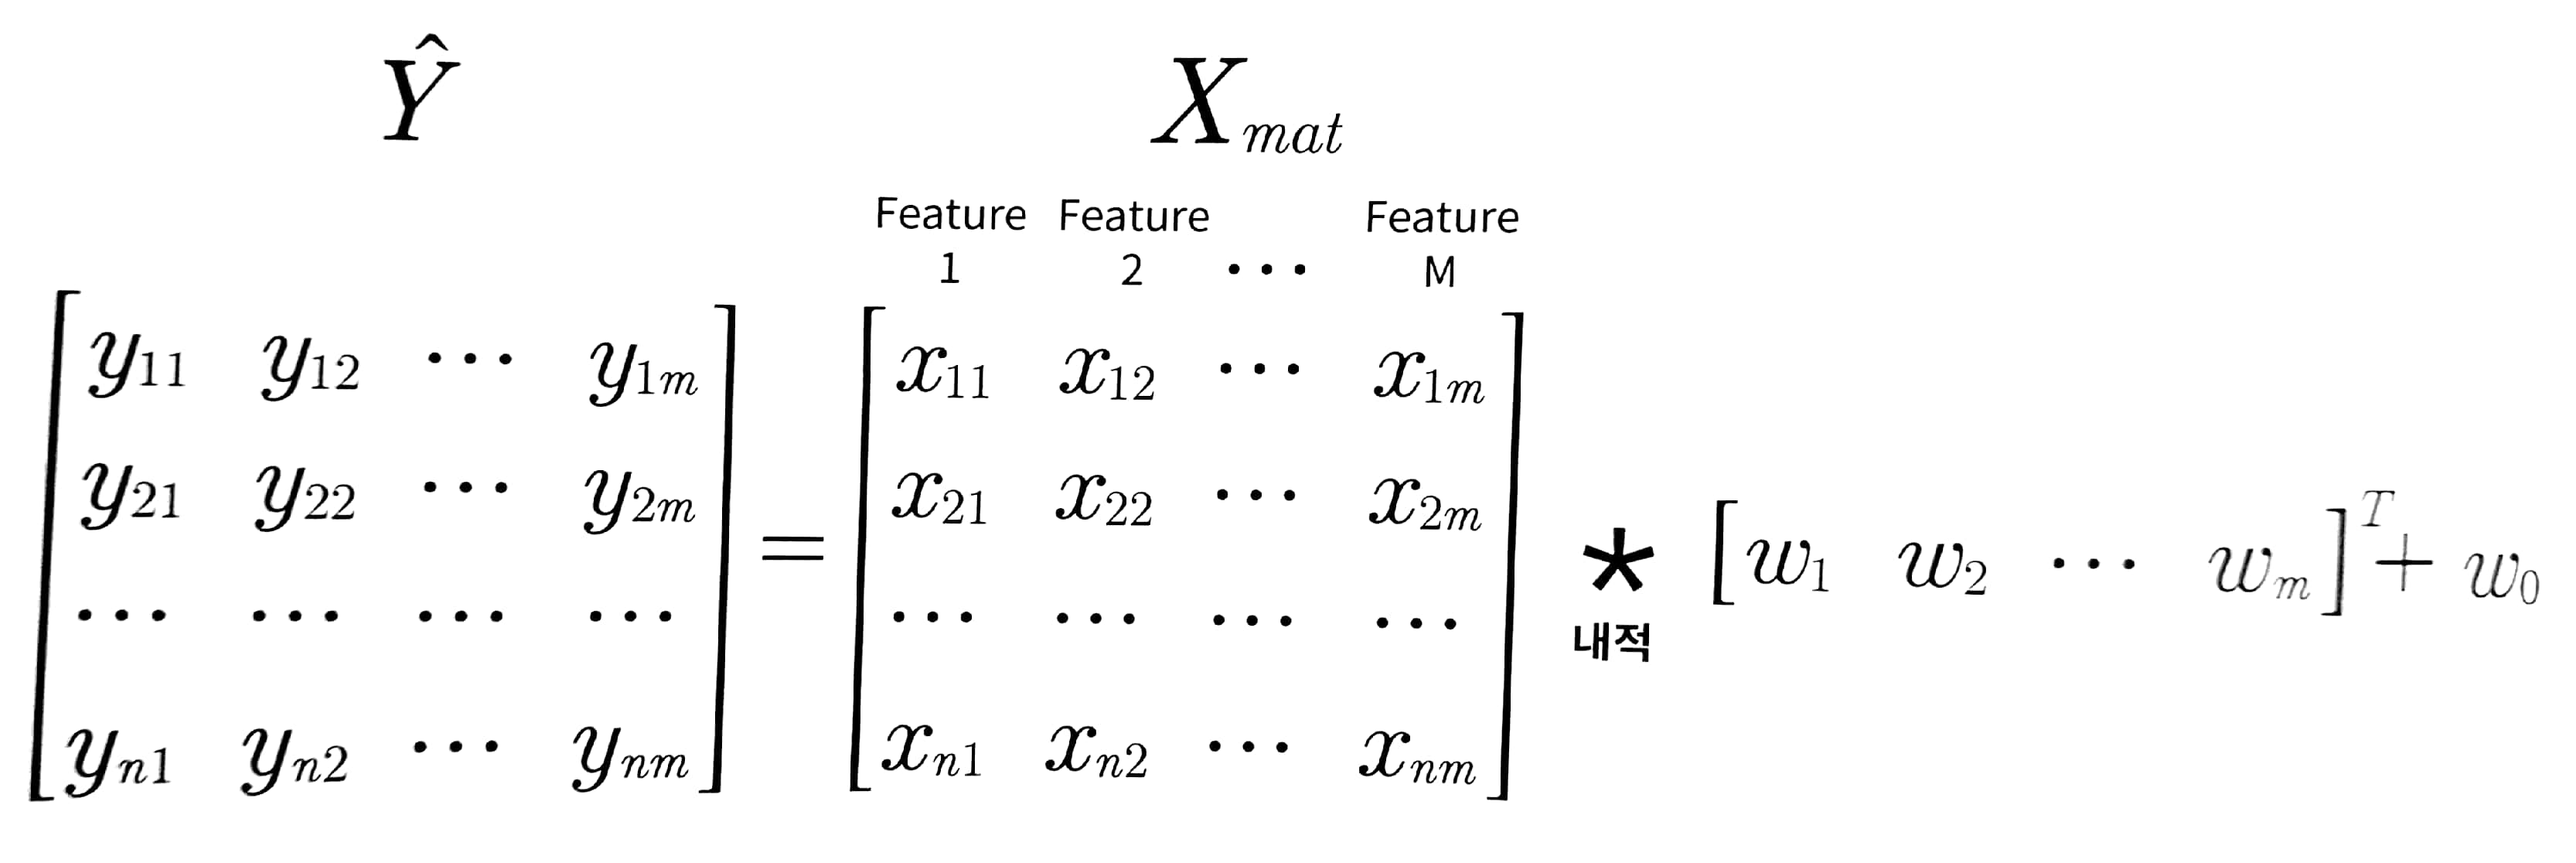  

---

$w_0$를 Weight의 배열인 W안에 포함시키기 위해 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat 0을 추가한다.
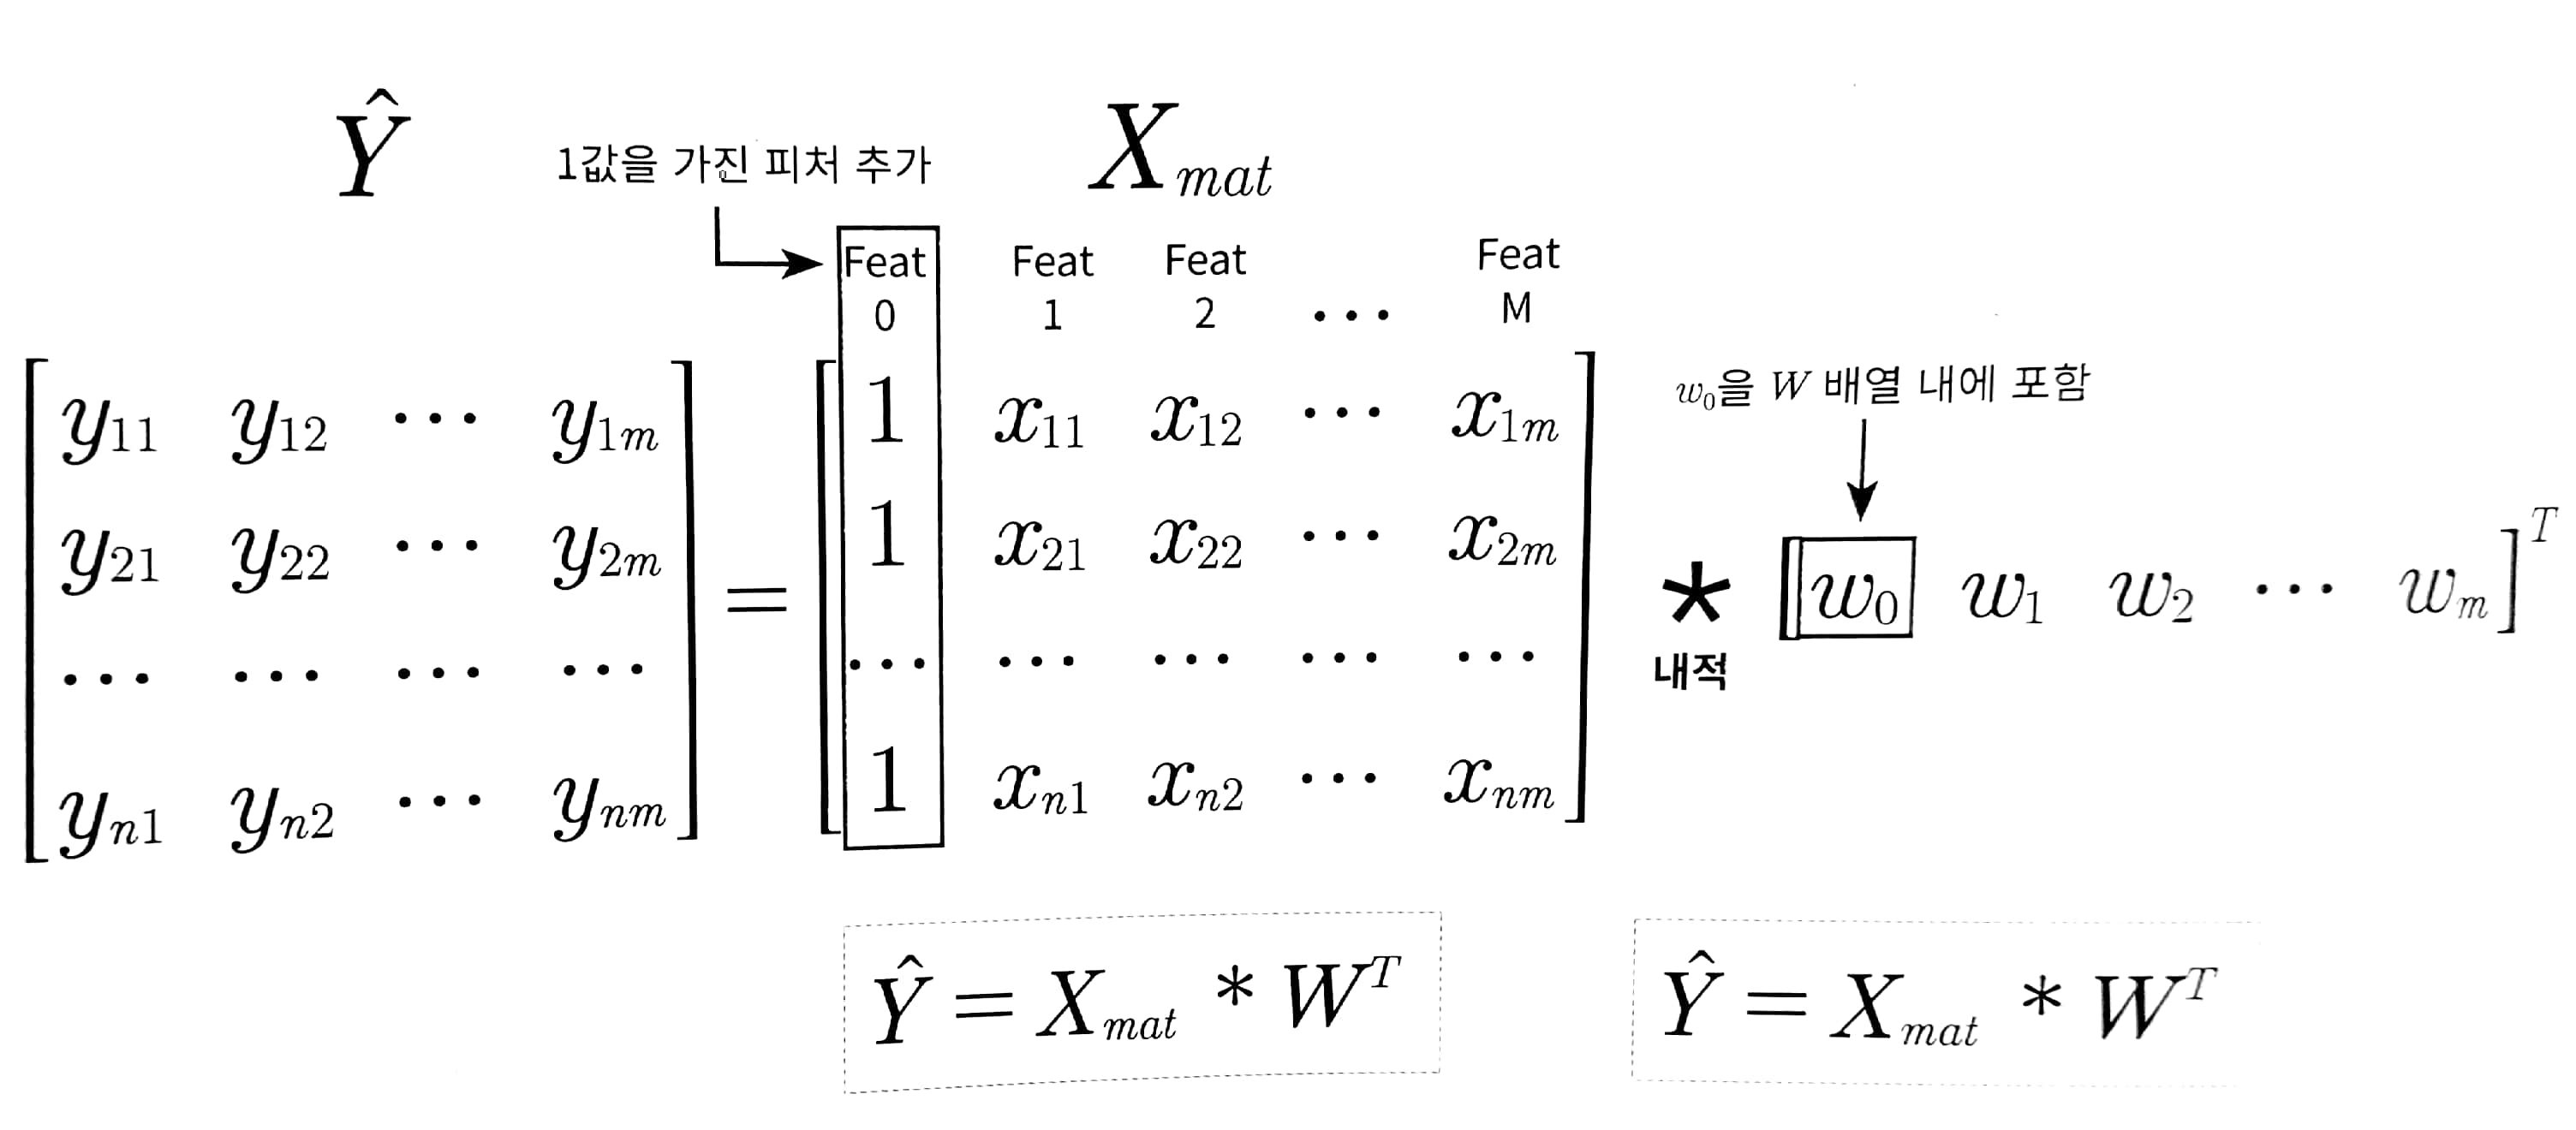
이제 회귀 예측값은 $\hat Y = X_mat*W^T$으로 도출할 수 있다.